Introduction to Machine Learning Assignment

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import keras
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import load_digits
from sklearn.manifold import TSNE
from sklearn.manifold import MDS
from keras import layers
import matplotlib.pyplot as plt

In [ ]:
data = load_digits()
digits_data = pd.DataFrame(data.data, columns = data.feature_names)
y = pd.DataFrame(data.target)

In [ ]:
digits_data.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [ ]:
digits_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1797 entries, 0 to 1796
Data columns (total 64 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pixel_0_0  1797 non-null   float64
 1   pixel_0_1  1797 non-null   float64
 2   pixel_0_2  1797 non-null   float64
 3   pixel_0_3  1797 non-null   float64
 4   pixel_0_4  1797 non-null   float64
 5   pixel_0_5  1797 non-null   float64
 6   pixel_0_6  1797 non-null   float64
 7   pixel_0_7  1797 non-null   float64
 8   pixel_1_0  1797 non-null   float64
 9   pixel_1_1  1797 non-null   float64
 10  pixel_1_2  1797 non-null   float64
 11  pixel_1_3  1797 non-null   float64
 12  pixel_1_4  1797 non-null   float64
 13  pixel_1_5  1797 non-null   float64
 14  pixel_1_6  1797 non-null   float64
 15  pixel_1_7  1797 non-null   float64
 16  pixel_2_0  1797 non-null   float64
 17  pixel_2_1  1797 non-null   float64
 18  pixel_2_2  1797 non-null   float64
 19  pixel_2_3  1797 non-null   float64
 20  pixel_2_

In [ ]:
digits_data.describe()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
count,1797.0,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,...,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000
mean,0.0,0.303840,5.204786,11.835838,11.848080,5.781859,1.362270,0.129661,0.005565,1.993879,...,3.725097,0.206455,0.000556,0.279354,5.557596,12.089037,11.809126,6.764051,2.067891,0.364496
std,0.0,0.907192,4.754826,4.248842,4.287388,5.666418,3.325775,1.037383,0.094222,3.196160,...,4.919406,0.984401,0.023590,0.934302,5.103019,4.374694,4.933947,5.900623,4.090548,1.860122
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.000000,1.000000,10.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,11.000000,10.000000,0.000000,0.000000,0.000000
50%,0.0,0.000000,4.000000,13.000000,13.000000,4.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,4.000000,13.000000,14.000000,6.000000,0.000000,0.000000
75%,0.0,0.000000,9.000000,15.000000,15.000000,11.000000,0.000000,0.000000,0.000000,3.000000,...,7.000000,0.000000,0.000000,0.000000,10.000000,16.000000,16.000000,12.000000,2.000000,0.000000
max,0.0,8.000000,16.000000,16.000000,16.000000,16.000000,16.000000,15.000000,2.000000,16.000000,...,16.000000,13.000000,1.000000,9.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000


In [ ]:
# https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html#sklearn.manifold.TSNE
# https://scikit-learn.org/stable/modules/generated/sklearn.manifold.MDS.html#sklearn.manifold.MDS

digits_TSNE = TSNE().fit_transform(digits_data)
digits_MDS = MDS().fit_transform(digits_data)

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


Autoencoder

In [ ]:
# The code below was taken from https://blog.keras.io/building-autoencoders-in-keras.html

encoding_dim = 2
input_data = keras.Input(shape=(64, ))
encoded = layers.Dense(encoding_dim, activation='relu')(input_data)
decoded = layers.Dense(64, activation = 'sigmoid')(encoded)

autoencoder = keras.Model(input_data, decoded)
encoder = keras.Model(input_data, encoded)
encoded_input = keras.Input(shape=(encoding_dim,))
decoder_layer = autoencoder.layers[-1]
decoder = keras.Model(encoded_input, decoder_layer(encoded_input))
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [ ]:
x_train, x_test= train_test_split(digits_data, test_size=0.2)
scalar = MinMaxScaler()
scale_train = scalar.fit_transform(x_train)
scale_test = scalar.transform(x_test)
print(x_train.shape)
print(x_test.shape)

(1437, 64)
(360, 64)


Epoch 1/200
6/6 [==============================] - 1s 28ms/step - loss: 0.7065 - val_loss: 0.7017
Epoch 2/200
6/6 [==============================] - 0s 6ms/step - loss: 0.6997 - val_loss: 0.6951
Epoch 3/200
6/6 [==============================] - 0s 6ms/step - loss: 0.6932 - val_loss: 0.6888
Epoch 4/200
6/6 [==============================] - 0s 7ms/step - loss: 0.6870 - val_loss: 0.6827
Epoch 5/200
6/6 [==============================] - 0s 7ms/step - loss: 0.6810 - val_loss: 0.6768
Epoch 6/200
6/6 [==============================] - 0s 9ms/step - loss: 0.6751 - val_loss: 0.6709
Epoch 7/200
6/6 [==============================] - 0s 8ms/step - loss: 0.6691 - val_loss: 0.6647
Epoch 8/200
6/6 [==============================] - 0s 12ms/step - loss: 0.6628 - val_loss: 0.6582
Epoch 9/200
6/6 [==============================] - 0s 9ms/step - loss: 0.6561 - val_loss: 0.6513
Epoch 10/200
6/6 [==============================] - 0s 12ms/step - loss: 0.6491 - val_loss: 0.6440
Epoch 11/200
6/6 [========

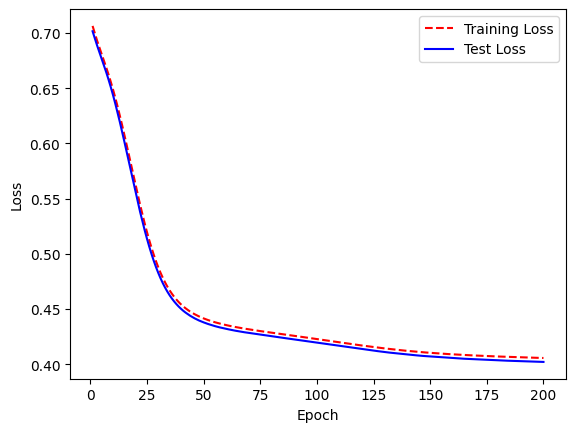

In [ ]:
# Plotting the loss-epochs https://stackoverflow.com/questions/54749649/how-to-plot-epoch-vs-val-acc-and-epoch-vs-val-loss-graph-in-cnn

history = autoencoder.fit(scale_train, scale_train, batch_size=256, epochs=200, shuffle=True, validation_data=(scale_test, scale_test))
training_loss = history.history['loss']
test_loss = history.history['val_loss']

# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, test_loss, 'b-')
plt.legend(['Training Loss', 'Test Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

12/12 [==============================] - 0s 977us/step


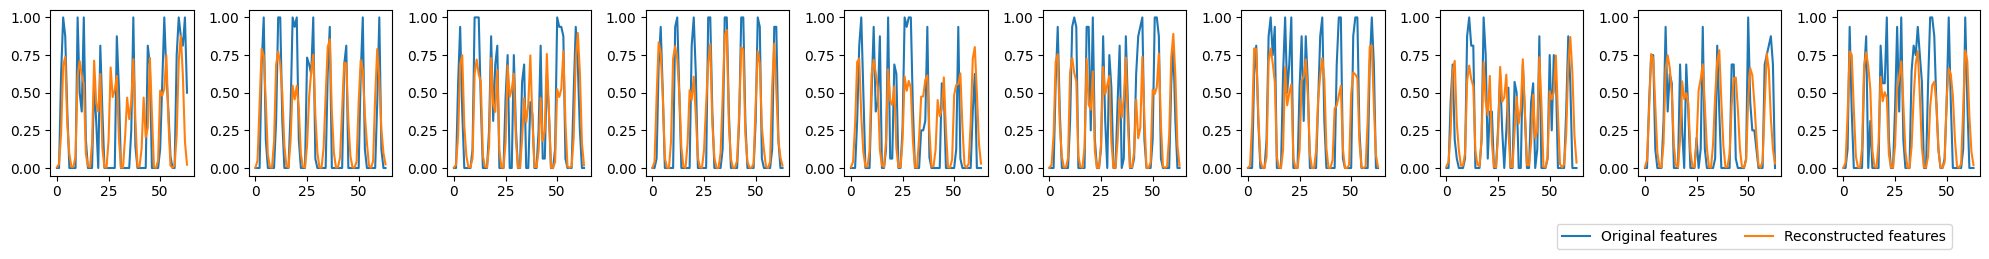

In [ ]:
# The code below was taken from https://blog.keras.io/building-autoencoders-in-keras.html

encoded_imgs = encoder.predict(scale_test)
decoded_imgs = decoder.predict(encoded_imgs)

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    plt.plot(scale_test[i])
    plt.plot(decoded_imgs[i])
    plt.gray()
    ax.get_xaxis().set_visible(True)
    ax.get_yaxis().set_visible(True)
    plt.tight_layout()

plt.legend(['Original features','Reconstructed features'], bbox_to_anchor=(0.85, -0.25), ncol = 3)
plt.show()

57/57 [==============================] - 0s 1ms/step


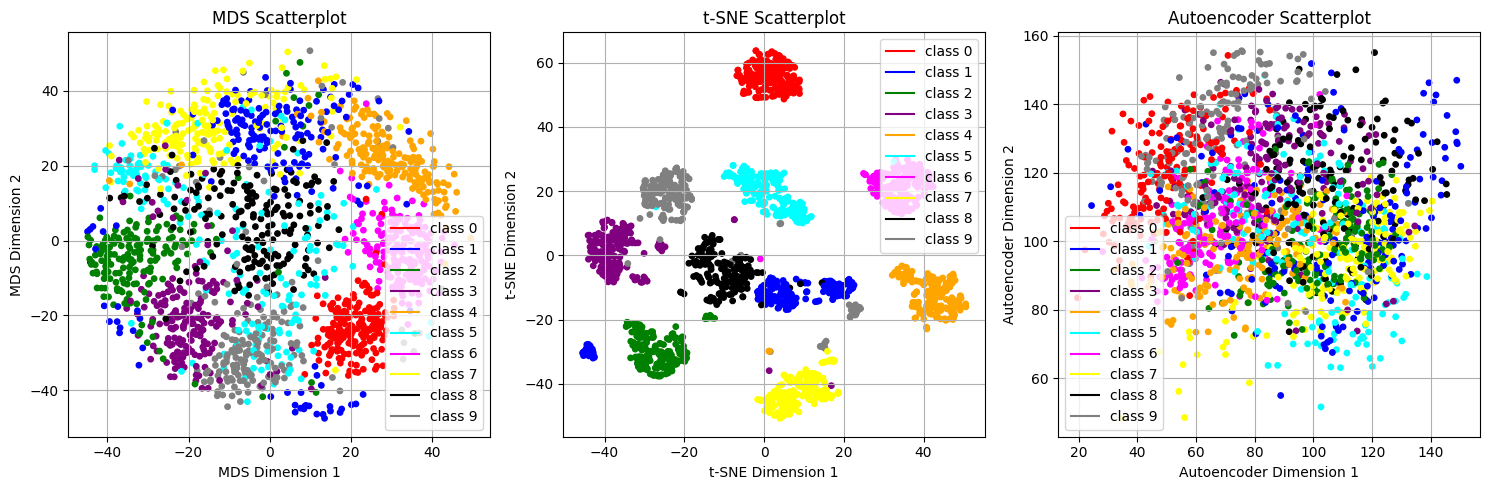

In [ ]:
encoded_data = encoder.predict(digits_data)

plt.figure(figsize = (15,5))

class_labels = y.values.flatten()

class_colors = {
    0: 'red',
    1: 'blue',
    2: 'green',
    3: 'purple',
    4: 'orange',
    5: 'cyan',
    6: 'magenta',
    7: 'yellow',
    8: 'black',
    9: 'gray'
}
data_colors = [class_colors[label] for label in class_labels[:200]]
data_colors2 = [class_colors[label] for label in class_labels]

line0, = ax.plot([], label='class 0')
line1, = ax.plot([], label='class 1')
line2, = ax.plot([], label='class 2')
line3, = ax.plot([], label='class 3')
line4, = ax.plot([], label='class 4')
line5, = ax.plot([], label='class 5')
line6, = ax.plot([], label='class 6')
line7, = ax.plot([], label='class 7')
line8, = ax.plot([], label='class 8')
line9, = ax.plot([], label='class 9')

line0.set_color(class_colors[0])
line1.set_color(class_colors[1])
line2.set_color(class_colors[2])
line3.set_color(class_colors[3])
line4.set_color(class_colors[4])
line5.set_color(class_colors[5])
line6.set_color(class_colors[6])
line7.set_color(class_colors[7])
line8.set_color(class_colors[8])
line9.set_color(class_colors[9])

# Scatterplot for the Multi-Dimensional Scaling
plt.subplot(1, 3, 1)
plt.scatter(digits_MDS[:, 0], digits_MDS[:, 1], c=data_colors2, s=15, label='MDS Embedding')
plt.title('MDS Scatterplot')
plt.xlabel('MDS Dimension 1')
plt.ylabel('MDS Dimension 2')
plt.legend(handles=[line0, line1, line2, line3, line4, line5, line6, line7, line8, line9])
plt.grid(True)

# Scatterplot for t-SNE
plt.subplot(1, 3, 2)
plt.scatter(digits_TSNE[:, 0], digits_TSNE[:, 1], c=data_colors2, label='t-SNE Embedding', s=15)
plt.title('t-SNE Scatterplot')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.legend(handles=[line0, line1, line2, line3, line4, line5, line6, line7, line8, line9])
plt.grid(True)


# Scatterplot for the autoencoder
plt.subplot(1, 3, 3)
plt.scatter(encoded_data[:, 0], encoded_data[:, 1], c=data_colors2, label='Autoencoder Embedding', s=15)
plt.title('Autoencoder Scatterplot')
plt.xlabel('Autoencoder Dimension 1')
plt.ylabel('Autoencoder Dimension 2')
plt.legend(handles=[line0, line1, line2, line3, line4, line5, line6, line7, line8, line9])
plt.grid(True)

plt.tight_layout()
plt.show()
